In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame({
    "beta": np.random.beta(5,1,1000)*60,
    "exponential": np.random.exponential(10,1000),
    "normal_p": np.random.normal(10,2,1000),
    "normal_l": np.random.normal(10,10,1000),
})

In [2]:
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)

In [3]:
bimodal = np.concatenate([first_half,second_half])
df["bimodal"] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,45.229345,8.669153,11.323477,25.780627,17.517321
1,30.234748,12.640290,11.308400,2.999903,24.525265
2,41.469150,3.884219,9.464373,7.467600,23.554222
3,57.684786,0.398500,9.069884,8.318172,21.148754
4,48.049449,10.577202,13.069086,23.922307,20.383910


<AxesSubplot: ylabel='Density'>

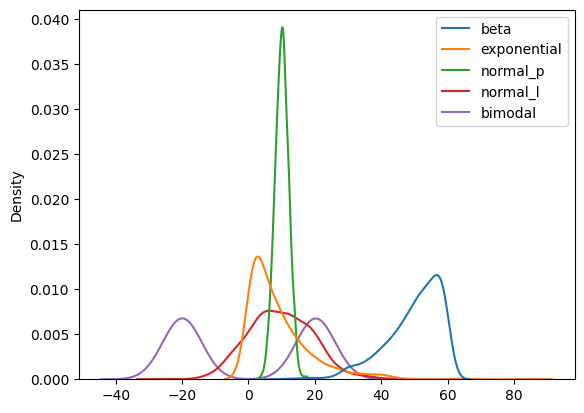

In [4]:
sns.kdeplot(data=df)

In [5]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.835518,9.181717,10.068068,9.628939,0.142383
std,8.342814,9.560237,2.042199,9.595591,20.339436
min,11.110235,0.005354,3.618160,-26.306931,-29.000693
25%,45.219566,2.234338,8.670430,2.957707,-19.969706
50%,51.746656,6.290979,10.124928,9.297231,-0.044372
75%,56.435240,13.008689,11.430385,16.614348,20.207397
max,59.996135,84.294806,17.495151,41.842621,29.194283


<AxesSubplot: ylabel='Density'>

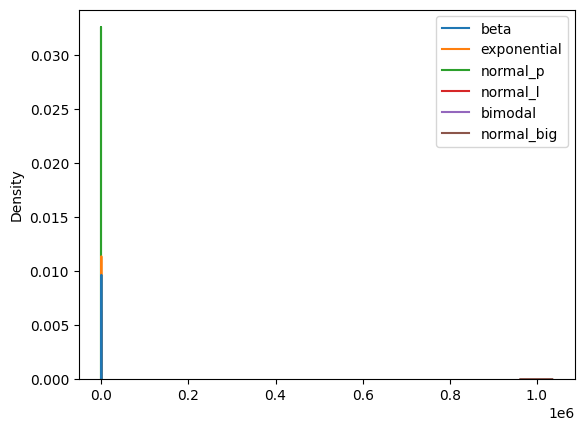

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))
df["normal_big"] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

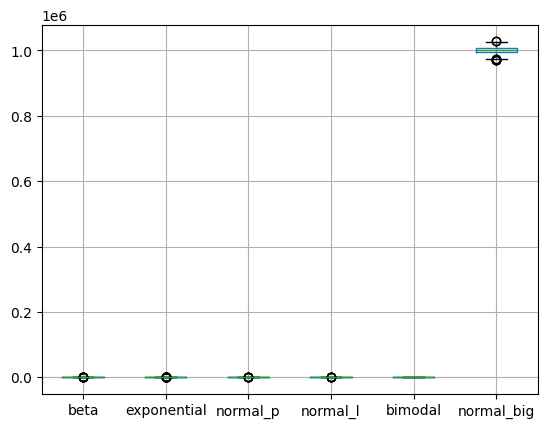

In [7]:
df.boxplot()

In [8]:
scaler = RobustScaler()

In [9]:
df_s = scaler.fit_transform(df)

In [10]:
col_names = list(df.columns)

In [11]:
df_s = pd.DataFrame(df_s, columns = col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.581090,0.220726,0.434264,1.206988,0.437107,1.170306
1,-1.918022,0.589299,0.428801,-0.461118,0.611533,-1.422673
2,-0.916352,-0.223379,-0.239335,-0.133974,0.587364,0.359094
3,0.529449,-0.546899,-0.382269,-0.071691,0.527493,-0.013849
4,-0.329646,0.397817,1.066742,1.070913,0.508456,-2.041900


<AxesSubplot: ylabel='Density'>

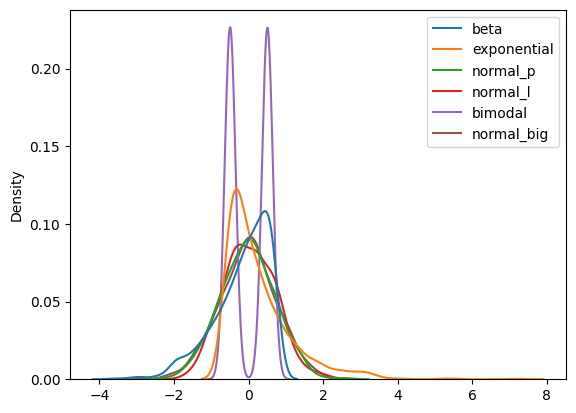

In [14]:
sns.kdeplot(data=df_s)

In [15]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,-1.703989e-01,2.682981e-01,-2.060185e-02,2.428917e-02,0.004648,-0.018455
std,7.438531e-01,8.873145e-01,7.399395e-01,7.026319e-01,0.506244,0.759854
min,-3.623181e+00,-5.833878e-01,-2.357564e+00,-2.607095e+00,-0.720717,-2.316632
25%,-5.819615e-01,-3.765091e-01,-5.270006e-01,-4.642081e-01,-0.495938,-0.512504
50%,-3.167632e-16,4.119968e-17,3.217912e-16,6.505213e-17,0.000000,0.000000
75%,4.180385e-01,6.234909e-01,4.729994e-01,5.357919e-01,0.504062,0.487496
max,7.355312e-01,7.239771e+00,2.670415e+00,2.383118e+00,0.727744,2.061778


<AxesSubplot: >

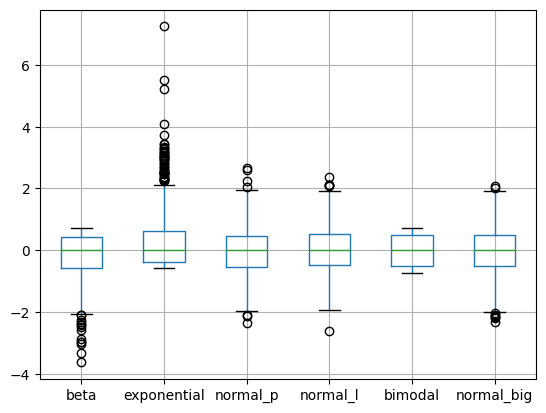

In [16]:
df_s.boxplot()

In [17]:
mins =[df_s[col].min() for col in df_s.columns]
mins

[-3.6231814054144125,
 -0.5833878353157156,
 -2.357563783828047,
 -2.607094974729025,
 -0.720716989527982,
 -2.3166315785488365]

In [ ]:
maxs = [df_s[col]]